# Итоговая работа по курсу «Python и математика для анализа данных»

1.Загрузить файл hr.csv.
2.Рассчитать основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).
3.Рассчитать и визуализировать корреляционную матрицу для переменных.
4.Визуализировать несколько взаимосвязей между переменными.
5.С использованием t-test статистики проверить взаимосвязи между несколькими переменными.
6.Рассчитать сколько работников работает в каждом департаменте.
7.Показать распределение сотрудников по зарплатам.
8.Показать распределение сотрудников по зарплатам совместно с департаментами.
9.Сколько сотрудников покинули компанию. 
10.Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию.
11.Загрузить результат (в формате .ipynb ноутбука) в репозиторий. Разместить ссылку на репозиторий в Личном кабинете

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statistics
from scipy.stats import pearsonr
from scipy import stats

In [7]:
#1.Загрузить файл hr.csv.
hr_df = pd.read_csv('hr.csv')
hr_df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [8]:
#2. Рассчитать основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).
hr_df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [11]:
#2. Рассчитать основные статистики для переменных (медиана, мода).
print('Медиана:\n', hr_df.median())
print('Мода satisfaction_level ',statistics.mode(hr_df.satisfaction_level))
print('Мода last_evaluation ',statistics.mode(hr_df.last_evaluation))
print('Мода time_spend_company ',statistics.mode(hr_df.time_spend_company))
print('Мода Work_accident ',statistics.mode(hr_df.Work_accident))
print('Мода left ',statistics.mode(hr_df.left))
print('Мода promotion_last_5years ',statistics.mode(hr_df.promotion_last_5years))

Медиана:
 satisfaction_level         0.64
last_evaluation            0.72
number_project             4.00
average_montly_hours     200.00
time_spend_company         3.00
Work_accident              0.00
left                       0.00
promotion_last_5years      0.00
dtype: float64
Мода satisfaction_level  0.1
Мода last_evaluation  0.55
Мода time_spend_company  3
Мода Work_accident  0
Мода left  0
Мода promotion_last_5years  0


In [14]:
# 3.Рассчитать и визуализировать корреляционную матрицу для переменных.
corr = hr_df.corr()
corr = corr.round(2)
corr.style.background_gradient(cmap='coolwarm')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1,0.11,-0.14,-0.02,-0.1,0.06,-0.39,0.03
last_evaluation,0.11,1,0.35,0.34,0.13,-0.01,0.01,-0.01
number_project,-0.14,0.35,1,0.42,0.2,-0,0.02,-0.01
average_montly_hours,-0.02,0.34,0.42,1,0.13,-0.01,0.07,-0
time_spend_company,-0.1,0.13,0.2,0.13,1,0,0.14,0.07
Work_accident,0.06,-0.01,-0,-0.01,0,1,-0.15,0.04
left,-0.39,0.01,0.02,0.07,0.14,-0.15,1,-0.06
promotion_last_5years,0.03,-0.01,-0.01,-0,0.07,0.04,-0.06,1


In [18]:
# type(df['sales'])
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
is_string_dtype(hr_df['sales'])
is_numeric_dtype(hr_df['sales'])

False

In [21]:
# 2 параметра salary и sales - категориальные. Из-за этого они не попадают в расчет корреляционной матрицы.
# Сделаем mapping и учтем их в матрице корреляций

# df.groupby('sales').mean()
if is_string_dtype(hr_df['sales']):
    d = {'IT' : 0, 
         'RandD' : 1, 
         'accounting' : 2,
         'hr' : 3, 
         'management' : 4,
         'marketing' : 5,
         'product_mng' : 6,
         'sales' : 7,
         'support' : 8,
         'technical' : 9}

    hr_df['sales'] = hr_df['sales'].map(d)
  
hr_df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,7,low
1,0.80,0.86,5,262,6,0,1,0,7,medium
2,0.11,0.88,7,272,4,0,1,0,7,medium
3,0.72,0.87,5,223,5,0,1,0,7,low
4,0.37,0.52,2,159,3,0,1,0,7,low


In [22]:
if is_string_dtype(hr_df['salary']):
    sal = {
        'high': 0,
        'low':1,
        'medium':2
    }
    hr_df['salary'] = hr_df['salary'].map(sal)
hr_df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.72,0.87,5,223,5,0,1,0,7,1
4,0.37,0.52,2,159,3,0,1,0,7,1


In [23]:
# А теперь повторно после препроцессинга посмотрим на матрицу корреляций
corr = hr_df.corr()
corr = corr.round(2)
corr.style.background_gradient(cmap='coolwarm')
# Корреляции с 'sales' и 'salary' нет. Зря делали, но зато наверняка

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
satisfaction_level,1,0.11,-0.14,-0.02,-0.1,0.06,-0.39,0.03,0,0.01
last_evaluation,0.11,1,0.35,0.34,0.13,-0.01,0.01,-0.01,0.01,0.01
number_project,-0.14,0.35,1,0.42,0.2,-0,0.02,-0.01,0.01,0.01
average_montly_hours,-0.02,0.34,0.42,1,0.13,-0.01,0.07,-0,0,0.01
time_spend_company,-0.1,0.13,0.2,0.13,1,0,0.14,0.07,-0.02,-0
Work_accident,0.06,-0.01,-0,-0.01,0,1,-0.15,0.04,0,-0
left,-0.39,0.01,0.02,0.07,0.14,-0.15,1,-0.06,0.03,-0
promotion_last_5years,0.03,-0.01,-0.01,-0,0.07,0.04,-0.06,1,-0.03,-0
sales,0,0.01,0.01,0,-0.02,0,0.03,-0.03,1,0
salary,0.01,0.01,0.01,0.01,-0,-0,-0,-0,0,1


Выводы по п.3:
Первым делом смотрим на целевой показатель - покинул компанию или нет (left). Это частая задача для бизнеса (фокус офис)
Дальше смотрим на то, от каких параметров он зависит. В нашем случае это:
satisfaction_level (-0,39)
time_spend_company (0,14)
Work_accident(-0,15)
Если мы в дальнейшем поймем, что высокая вероятность ухода, то нажимая на эти показатели, скорее всего сможем как-то скорректировать ситуацию. Но мы не можем сказать, "если нажмем, то сохраним человека", так как факторы могут просто следовать за 3м параметром, отсутствующим в Dataset

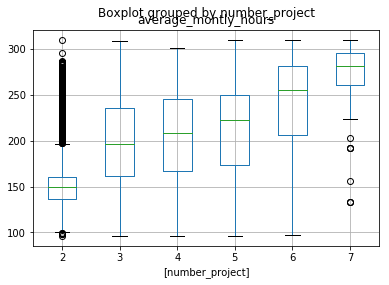

In [24]:
# 4.Визуализировать несколько взаимосвязей между переменными.
# В Dataset корреляционные связи имеют категориальные переменные. Их лучше через boxplot визуализировать
boxplot = hr_df[['number_project', 'average_montly_hours' ]].boxplot(by='number_project')

Выводы по визуализации 4.1:
Чем больше проектов ведет человек, тем больше времени он расходует
Медиана расхода часов примерно одинакова для сотрудников, которые ведут 3 проекта и 5 проектов. Если ввести нормативы по количеству проектов ~5, то будет прирост производительности без прироста оплаты (по часовой ставке)

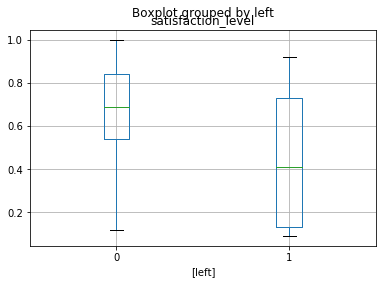

In [25]:
# Визуализировать несколько взаимосвязей между переменными
boxplot = hr_df[['satisfaction_level', 'left' ]].boxplot(by='left')

Выводы по визуализации 4.2:
Видно что Медиана удовлетворенности сотрудников, покинувших компанию меньше, чем тех кто еще остался
1-3 квартили Удовлетворенности - большой размах, по сравнению оставшимися. Возможно это свидетельствует о том, что есть также другие причины ухода (например, Переезд в другой город)

In [27]:
# 5.С использованием t-test статистики проверить взаимосвязи между несколькими переменными.

#  среднее значение price машин с размером двигателя больше 150 = price всей выборки
# среднее значение satisfaction_level людей покинувших компанию = satisfaction_level всех сотрудников
satisfaction_level_left = hr_df[hr_df['left'] == 1]['satisfaction_level']

stats.ttest_1samp(satisfaction_level_left, hr_df['satisfaction_level'].mean())
# p-value равно 9e-279, что меньше стандартной альфа ошибки 0.05, поэтому мы отбрасываем нулевую гипотезу и можем сказать, 
# что имеется статистическое различие между satisfaction_level уволившихся и генеральной совокупностью всех людей.

Ttest_1sampResult(statistic=-39.10948894348423, pvalue=9.0127811954355e-279)

In [28]:
# 'number_project', 'average_montly_hours'
#  Среднее значение часов в месяц у людей, участвующих в 2 проектах, равно среднему числу часов в месяц у всех людей
average_montly_hours_2 = hr_df[hr_df['number_project'] == 2]['average_montly_hours']

stats.ttest_1samp(satisfaction_level_left, hr_df['average_montly_hours'].mean())
# p-value равно 0, что меньше стандартной альфа ошибки 0.05, поэтому мы отбрасываем нулевую гипотезу и можем сказать, 
# что имеется статистическое различие между average_montly_hours у людей, участвующих в 2 проектах, и генеральной совокупностью всех людей.

Ttest_1sampResult(statistic=-45420.67748547626, pvalue=0.0)

In [29]:
# на этапе поиска корреляций делал mapping. Сейчас не актуально, поэтому зановов перезагружу Dataset
hr_df1 = pd.read_csv('hr.csv')
hr_df1.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [31]:
# 6.Рассчитать сколько работников работает в каждом департаменте.
# ставим фильтр, потому что тот кто 'left' = 'ушел' и сейчас не работает в компании
hr_df_alife = hr_df1[hr_df1['left']==0]
hr_df_alife.head()

hr_df_alife1 = hr_df_alife[['average_montly_hours','sales']].groupby('sales').count().reset_index()
hr_df_alife1 = hr_df_alife1.rename(columns = {"sales":"Department", "average_montly_hours":"Count_of_employees" }) 
hr_df_alife1

,Department,Count_of_employees
0,IT,954
1,RandD,666
2,accounting,563
3,hr,524
4,management,539
5,marketing,655
6,product_mng,704
7,sales,3126
8,support,1674
9,technical,2023


Выводы по пункту 6:
Из количества сотрудников technical видно, что компания техническая
Так как число сотрудников sales больше чем support - скорее всего компания на этапе развития
Большая доля accounting и hr в штате. Скорее всего можно оптимизировать "Усредненные нормативы службы персонала: 1 менеджер по персоналу – на 100 человек (персонала компании) 1 работник ОК – на 300-400 человек (персонала компании) 1 рекрутер – 10-15 вакансий"

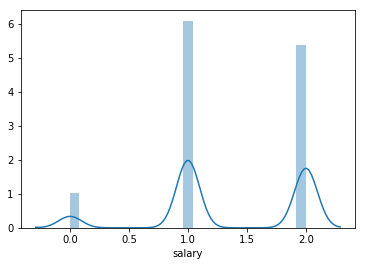

In [32]:
# 7.Показать распределение сотрудников по зарплатам.
sns.distplot(hr_df['salary'])
#         'high': 0,
#         'low':1,
#         'medium':2

Выводы по п. 7:
Основаная масса сотрудников получает Низкую з.пл, чуть меньше среднюю и совсем мало получают высокую Данное распределение характерно для текущего рынка труда. На этапе развития - Высокую зарплату получают подразделения отвечающие за рост и развитие (продуктов + продажи)

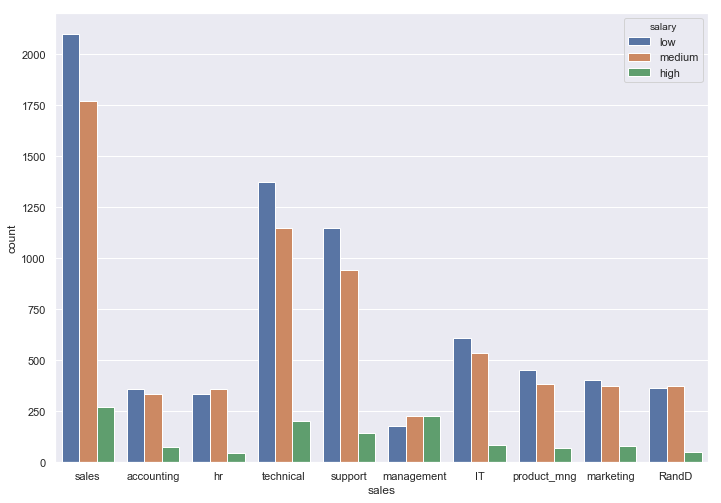

In [34]:
# 8.Показать распределение сотрудников по зарплатам совместно с департаментами.
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(x="sales", hue="salary", data=hr_df1 )

Выводы по п.8:
Менеджмент получает хорошо (много сотрудников с высокой долей высоких з.пл
sales, technical, support - низких зарплат больше всего, потом средние, потом высокие. Скорее всего это связано с высокой текучестью в этих подразделениях. Компания зарабатывает на "дешевых сотрудниках"
accounting, hr, marketing, RandD - низкие и средние зарплаты примерно равны по количеству людей. Это говорит о низжей текучести, по сравнению с предыдущим буллетом. Скорее всего люди уже повысили грейд внутри компании

In [35]:
#9.Сколько сотрудников покинули компанию.
print('Количество сотрудников покинувших компанию',hr_df['left'].loc[hr_df['left']==1].sum(),'человек')

Количество сотрудников покинувших компанию 3571 человек


Выводы по п. 9:
    Компанию покинуло 3571 сотрудник, что не является показательным. Важно понимать, за какое время они покинули компанию.
    Количество покинувших компанию учитывается при расчете [текучести за год] = [Количество уволенных]/[Среднесписочную численность]
При этом, разные отрасли имеют разные нормативы по текучести. 
Если текучесть больше норматива - то увеличивается стоимость подбора и знания не накапливаются внутри компании.
Но идет значительная экономия на з.пл (с высокой текучестью работают банки, розничная торговля) 
Для технологических компаний ~5%год нормально.
В банковской сфере ~ 40% текучесть
В розничной торговле (массовые позиции) до 100% в год

In [41]:
# 10.Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию.
# Низкий satisfaction_level 
import scipy

r, p_value = scipy.stats.pearsonr(hr_df['satisfaction_level'], hr_df['left'])
print('Коэффициент корреляции Пирсона равен: ', r ,', p_value: ' , p_value)

# Фактор 1: Компанию покидают сотрудники с низким уровнем удовлетворенности

Коэффициент корреляции Пирсона равен:  -0.38837498342411414 , p_value:  0.0


In [42]:
# Work_accident   
r, p_value = scipy.stats.pearsonr(hr_df['Work_accident'], hr_df['left'])
print('Коэффициент корреляции Пирсона равен: ', r ,', p_value: ' , p_value)

# Фактор 2: В компании остаются сотрудники, которые имеют Work_accident. 
# Возможно они не достаточно опытны, чтобы найти работу на внешнем рынке. 
# И набираются опыта в этой компании

Коэффициент корреляции Пирсона равен:  -0.15462163370513482 , p_value:  6.61304940044438e-81


In [45]:
# time_spend_company
r, p_value = scipy.stats.pearsonr(hr_df['time_spend_company'], hr_df['left'])
print('Коэффициент корреляции Пирсона равен: ', r ,', p_value: ' , p_value)

# Фактор 3: время проведенное внутри компании. Тут стандартный жизненный цикл сотрудника. После определенного стажа, 
# нет смысла индексировать сотрудника. Поэтому начинает работать правило: "up or out" или "протухнуть"

Коэффициент корреляции Пирсона равен:  0.14482217493938596 , p_value:  4.207680457693763e-71


Общие выводы: Технологическая компания на этапе развития Чтобы снизить текучесть надо:
Увеличить Удовлетворенность -- как показывает практика, определяется разницей з.пл между медианой рынка и получаемой на руки. -- качество менеджмента, как правило втарая в рейтинге причина увольнения
Повысить производительность можно за счет введения норматива по курируемым проектам (с 3 проекта до 5 проектов)При жтом прироста почасовой оплаты не произойдет, скорее всего. Надо детальнее смотреть систему мотивации